# 11장 해시 테이블

> 해시 테이블 또는 해시 맵은 키를 값에 매핑할 수 있는 구조인, 연관 배열 추상 자료형 (ADT)을 구현하는 자료구조입니다.

해시 테이블의 가장 큰 특징은 대부분의 연산이 분할 상황 분석에 따른 시간 복잡도가 O(1)이라는 점입니다. 덕분에 데이터 양에 관계없이 빠른 성능을 기대할 수 있다는 장점이 있습니다.

### 해시

> 해시 함수란 임의 크기 데이터를 고정 크기 값으로 매핑하는 데 사용할 수 있는 함수를 말합니다.

해시 테이블의 핵심은 해시 함수입니다. 여기서 입력값은 ABC, 1324BC, AF32B로 각각 3글자, 6글자, 5글자이지만, 화살표로 표시한 특정 함수를 통과하면 2바이트의 고정 크기 값으로 매핑됩니다.

여기서 화살표 역할을 하는 함수가 해시 함수입니다.

ABC -> A1
1324BC -> CB
AF32B -> D5

해시 테이블을 인덱싱하기 위해 이처럼 해시 함수를 사용하는 것을 해싱(Hashing)이라 하며, 해싱은 정보를 가능한 빠르게 저장하고 검색하기 위해 사용하는 중요한 기법 중 하나입니다.

해싱은 최적의 검색이 필요한 분야에 사용되며, 심볼 테이블 (일반적으로 해시 테이블로 구현됩니다.) 등의 자료구조를 구현하기에도 적합합니다.

이외에도 해시 함수는 체크섬 (Checksum), 손실 압축, 무작위화 함수 (Randomization Function), 암호 등과도 관련이 깊으며 때로는 서로 혼용되기도 합니다.

성능 좋은 해시 함수들의 특징
- 해시 함수 값 충돌의 최소화
- 쉽고 빠른 연산
- 해시 테이블 전체에 해시 값이 균일하게 분포
- 사용할 키의 모든 정보를 이용하여 해싱
- 해시 테이블 사용 효율이 높을 것

In [ ]:
# 생일 문제
import random

TRIALS = 100000 # 10만 번 실험
same_birthdays = 0 # 생일이 같은 실험의 수

# 10만 번 실험 진행
for _ in range(TRIALS):
  birthdays = []
  # 23명이 모였을 때, 생일이 같을 경우 same_birthdays +=1
  for i in range(23):
    birthday = random.randint(1, 365)
    if birthday in birthdays:
      same_birthdays += 1
      break
    birthdays.append(birthday)

# 전체 10만 번 실험 중 생일이 같은 실험의 확률
print(f'{same_birthdays / TRIALS * 100}%')

50.72%


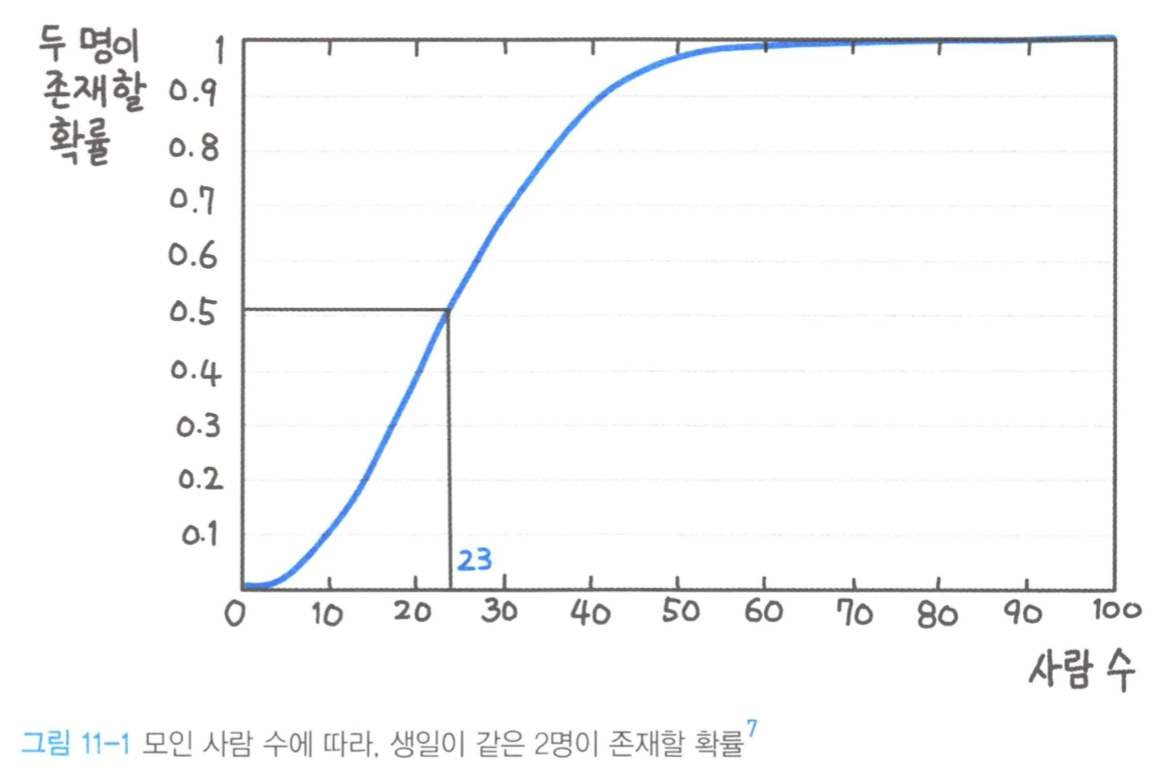

### 비둘기집 원리

> 비둘기집 원리란, n개 아이템을 m개 컨테이너에 넣을 때, n>m이라면 적어도 하나의 컨테이너에는 반드시 2개 이상의 아이템이 들어 있다는 원리를 말합니다.

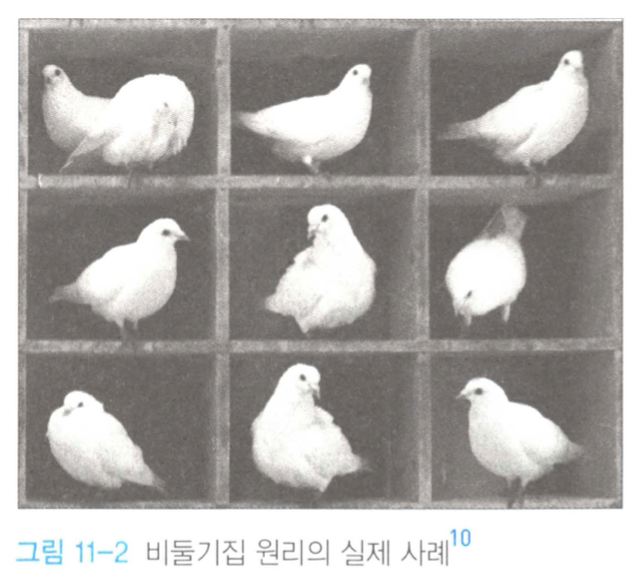

### 로드 팩터

> 로드 팩터란 해시 테이블에 저장된 데이터 개수 n을 버킷의 개수 k로 나눈 것이다.

load factor = n / k

로드 팩터 비율에 따라서 해시 함수를 재작성해야 될지 또는 해시 테이블의 크기를 조정해야 할지를 결정합니다.

또한, 이 값은 해시 함수가 키들을 잘 분산해 주는지를 말하는 효율성 측정에도 사용됩니다.

자바 10에서는 해시맵의 디폴트 로드 팩터를 0.75로 정했으며

'시간과 공간 비용의 적절한 절충안' 이라고 이야기 합니다.

일반적으로 로드 팩터가 증가할 수록 해시 테이블의 성능은 점점 감소하게 되며, 자바 10의 경우 0.75를 넘어설 경우 동적인 배열처럼 해시 테이블의 공간을 재할당합니다.

### 해시 함수

아래 그림은 해시 함수를 통해 키가 해시 값으로 변경되는 과정을 도식화한 것입니다.

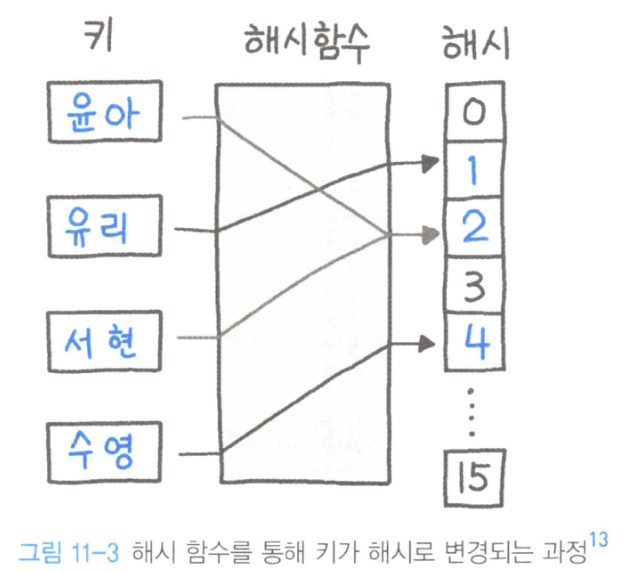

이처럼 해시 테이블을 인덱싱하기 위해 해시 함수를 사용하는 것을 해싱 (Hashing) 이라고 합니다.

해싱에는 다양한 알고리즘이 있으며, 최상의 분포를 제공하는 방법은 데이터에 따라 제각각입니다.

이처럼 해시 함수는 매우 중요한 역할을 하는데, 몇 년 전 구글은 해시 함수를 딥러닝으로 학습한 모델을 적용해 충돌을 최소화하는 논문을 발표하며, 해시 테이블 자료구조의 미래를 기대케 하기도 했습니다.

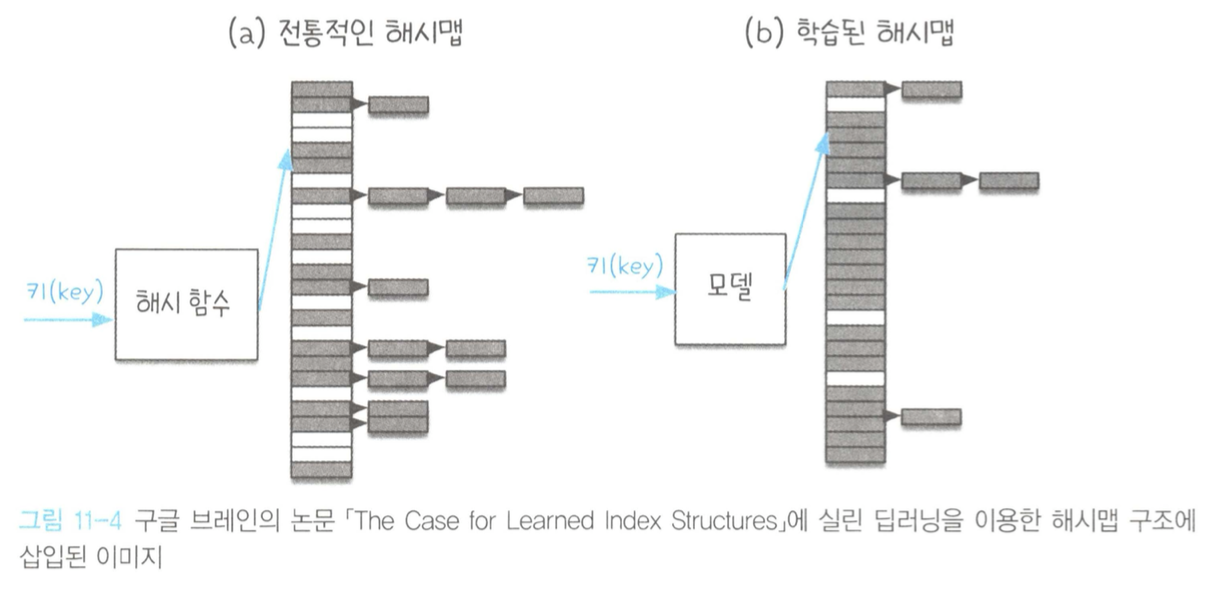

### 충돌

아무리 좋은 해시 함수라도 아래 그림과 같이 충돌 (Collison)은 발생하게 됩니다.

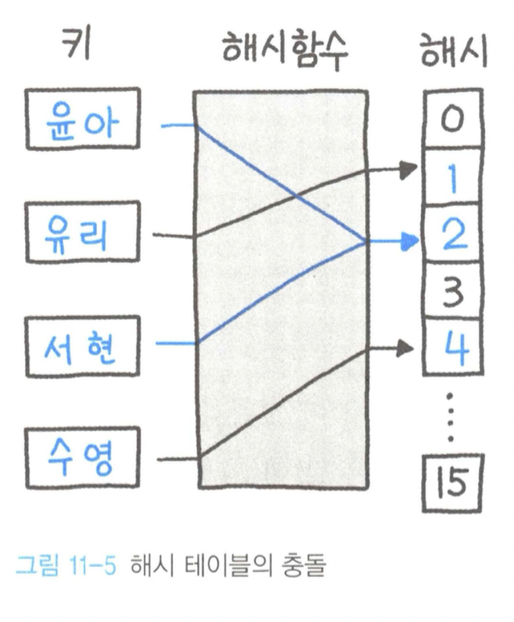

윤아와 서현은 해시 값이 2로 같은 값이 되어 충돌이 발생했습니다.

충돌이 발생하는 경로는 파란색으로 표시 했습니다. 이제 이처럼 충돌이 발생할 경우 어떤 식으로 처리하게 되는 지 살펴봅시다.

### 개별 체이닝

먼저, 입력값은 다음 표와 같이 정해보자.

해시는 키를 해싱한 결과이며, '윤아'와 '서현'을 해싱한 결과는 충돌한다고 가정합니다.

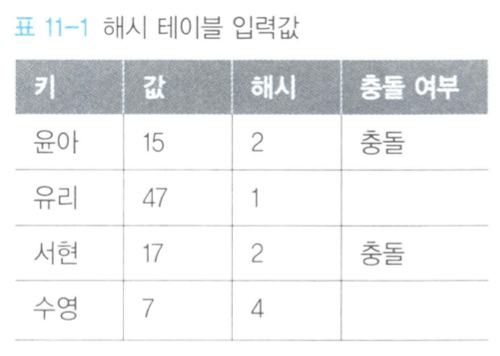

이 표를 개별 체이닝 (Separate Chaining) 방식으로 구현하면 아래 그림과 같습니다.

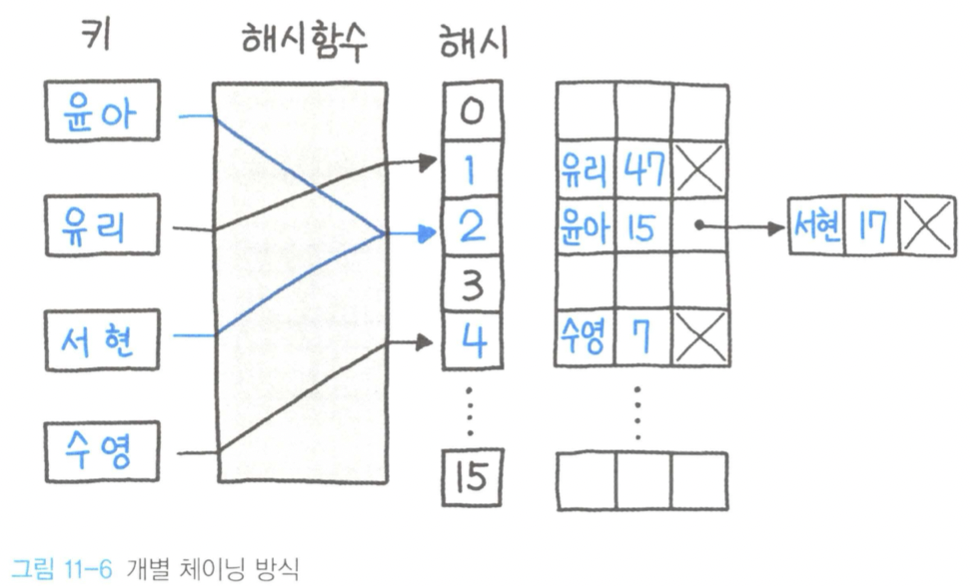

해시 테이불의 기본 방식이기도 한 개별 체이닝은 총돌 발생 시 이 그림과 같이 연결 리스트로 연결 link 하는 방식이다. 충돌이 발생한 '윤아’와 '서현'은 ‘윤아’의 다음 아이템이 '서현'인 형태로 서로 연결 리스트로 연결되었습니다. 이처럼 기본적인 자료구조와 임의로 정한 간단한 알고리즘만 있으면 되므로, 개별 체이닝 방식은 인기가 높습니다. 원래 해시 테이블 구조의 원형이기도 하며 가장 전통적인 방식으로, 흔히 해시 테이블이라고 하면 바로 이 방식을 말합니다. 간단한 원리를 요약하면 다음과 같습니다.

> 1. 키의 해시 값을 계산한다.
> 2. 해시 값을 이용해서 배열의 인덱스를 구합니다.
> 3. 같은 인덱스가 있다면 연결 리스트로 연결합니다.

### 28. 해시맵 디자인

다음의 기능을 제공하는 해시맵을 디자인하라.

- put(key, value) : 키, 값을 해시맵에 삽입한다. 만약 이미 존재하는 키라면 업데이트한다.
- put(key) : 키에 해당하는 값을 조회한다. 만약 키가 존재하지 않는다면 -1을 리턴한다.
- remove(key) : 키에 해당하는 키, 값을 해시맵에서 삭제한다.

### 풀이 1. 개별 체이닝 방식을 이용한 해시 테이블 구현

[reference1](https://velog.io/@corone_hi/28.-Design-HashMap)

[reference2](https://velog.io/@eunseokim/%ED%95%B4%EC%89%AC-%ED%85%8C%EC%9D%B4%EB%B8%94Hash-Table)

[reference3](https://www.pymoon.com/entry/706-Design-HashMap)

In [ ]:
import collections

# 키, 값을 보관하고 연결 리스트로 처리할 별도의 객체를 ListNode라는 이름의 클래스로 정의해줍니다.
class ListNode(object):
    def __init__(self, key = None, value=None):
        self.value = value
        self.key = key
        self.next = None

class MyHashMap:
    # 초기화
    def __init__(self):
        self.size = 1000 # 기본 사이즈는 1000개 정도로 적당히 설정하고, 각 ListNode를 담게 될 기본 자료형을 선언해줍니다.
        self.table = collections.defaultdict(ListNode) # 편리하게 구현하기 위해 존재하지 않는 키를 조회할 경우 자동으로 디폴트 값을 생성해주닌 collections.defaultdict를 사용해 줍니다.

    # 삽입
    def put(self,key:int,value:int)->None:
        index = key % self.size
        
        # 인덱스 노드가 없다면 삽입 후 종료
        if self.table[index].value is None:
            self.table[index] = ListNode(key,value)
            return
        
        # 인덱스에 노드가 존재하는 경우 연결리스트 처리
        p = self.table[index]
        while p:
            if p.key == key:
                p.value = value
                return
            if p.next is None:
                break
            p = p.next
        p.next = ListNode(key,value)
        
    # 조회
    def get(self,key:int)->int:
        index = key % self.size
        if self.table[index].value is None:
            return -1
        
        # 노드가 존재할 때 일치하는 키 탐색
        p = self.table[index]
        while p:
            if p.key == key:
                return p.value
            p = p.next
        return -1

    # 삭제
    def remove(self,key:int)->None:
        index = key%self.size
        if self.table[index].value is None:
            return
        
        # 인덱스의 첫 번째 노드일 때 삭제 처리
        p = self.table[index]
        if p.key == key:
            self.table[index] = ListNode() if p.next is None else p.next
            return
        
        # 연결 리스트 노드 삭제
        prev = p
        while p:
            if p.key ==key:
                prev.next = p.next
                return
            prev, p = p, p.next

In [ ]:
hm = MyHashMap() # MyHashMap 객체 생성
print(hm) # MyHashMap object 생성 확인

In [ ]:
hm.put(1, 1)

In [ ]:
hm.put(2, 2)

In [ ]:
hm.get(1) # 1을 리턴해 줍니다. (키가 존재)

1

In [ ]:
hm.get(3) # -1을 리턴해 줍니다. (키가 존재하지 않음)

-1

In [ ]:
hm.put(2, 1) # 값을 업데이트 해줍니다.

In [ ]:
hm.get(2) # 1을 리턴해 줍니다. (키가 존재)

1

In [ ]:
hm.remove(2) # 키 2에 해당하는 키, 값을 삭제해줍니다.

In [ ]:
hm.get(2) # -1을 리턴해 줍니다. (키가 삭제 되어 존재하지 않음)

-1

### 29. 보석과 돌

J는 보석이며, S는 갖고 있는 돌이다. S에는 보석이 몇 개나 있을까? 대소문자는 구분한다.

- 입력 : 
J = "aA", S = "aAAbbbb"

- 출력 : 
3


### 풀이 1. 해시 테이블을 이용한 풀이

In [ ]:
def num_jewels_in_stones(J, S):
  freqs = {}
  count = 0
 
  # 돌(S)의 빈도 수 계산
  for char in S:
    if char not in freqs:
      freqs[char] = 1
    else:
      freqs[char] += 1
  
  # 보석(J)의 빈도 수 합산
  for char in J:
    if char in freqs:
      count += freqs[char]
 
  return count
 
J = "aA"
S = "aAAbbbb"
print(num_jewels_in_stones(J, S))

3


### 풀이 2. defaultdict를 이용한 비교 생략

defaultdict를 사용해서 존재하지 않는 키에 대해 디폴트를 리턴해주는 풀이를 통해 코드 줄 수를 훨씬 더 줄일 수 있다.

In [ ]:
import collections
 
def num_jewels_in_stones(J, S):
  freqs = collections.defaultdict(int)
  count = 0
 
  # 비교 없이 돌(S) 빈도 수 계산
  for char in S:
    freqs[char] += 1
 
  # 비교 없이 보석 (J) 빈도 수 합산
  for char in J:
    count += freqs[char]
 
  return count
 
J = "aA"
S = "aAAbbbb"
print(num_jewels_in_stones(J, S))

3


### 풀이 3. Counter로 계산 생략

In [ ]:
import collections
 
def num_jewels_in_stones(J, S):
  freqs = collections.Counter(S) # 돌(S) 빈도 수 계산
  count = 0
 
  # 비교 없이 보석(J) 빈도 수 합산
  for char in J:
    count += freqs[char]
  
  return count
 
J = "aA"
S = "aAAbbbb"
print(num_jewels_in_stones(J, S))

3


### 풀이 4. 파이썬다운 방식

In [ ]:
def num_jewels_in_stones(J, S):
  return sum(s in J for s in S)
 
J = "aA"
S = "aAAbbbb"
print(num_jewels_in_stones(J, S))

3


### 30. 중복 문자 없는 가장 긴 부분 문자열

중복 문자가 없는 가장 긴 부분 문자열의 길이를 리턴하라.

예제 1
- 입력 : "abcabcbb"
- 출력 : 3
- 설명 : 정답은 "abc"로 길이는 3이다.

예제 2
- 입력 : "bbbbb"
- 출력 : 1
- 설명 : 정답은 "b"로 길이는 1이다.

예제 3
- 입력 : "pwwkew"
- 출력 : 3
- 설명 : 정답은 "wke"로 길이는 3이다.

### 풀이 1. 슬라이딩 윈도우와 투 포인터로 사이즈 조절

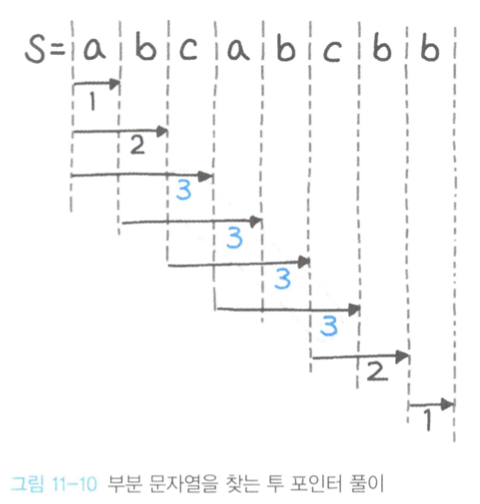

In [ ]:
def length_of_longer_substring(str):
  used = {}
  max_length = start = 0
  for index, char in enumerate(str):
    # 이미 등장했던 문자라면 'start' 위치 갱신
    if char in used and start <= used[char]:
      start = used[char] + 1
    else: # 최대 부분 문자열 길이 갱신
      max_length = max(max_length, index - start + 1)
 
    # 현재 문자의 위치 삽입
    used[char] = index
 
  return max_length
 
str = "abcabcbb"
print(length_of_longer_substring(str))

3


### 31. 상위 K 빈도 요소

상위 K번 이상 등장하는 요소를 추출하라.

- 입력 : nums = [1, 1, 1, 2, 2, 3], k = 2
- 출력 : [1, 2]

### 풀이 1. Counter를 이용한 음수 순 추출

In [ ]:
import collections
import heapq
 
def top_k_frequent(nums, k):
  freqs = collections.Counter(nums)
  freqs_heap = []
 
  for f in freqs:
    heapq.heappush(freqs_heap, (-freqs[f], f))
 
  topk = list()
 
  for _ in range(k):
    topk.append(heapq.heappop(freqs_heap)[1])
 
  return topk
 
nums = [1,1,1,2,2,3]
k = 2
print(top_k_frequent(nums, k))

[1, 2]


### 풀이 2. 파이썬다운 방식

In [ ]:
import collections
 
def top_k_frequent(nums, k):
  return list(zip(*collections.Counter(nums).most_common(k)))[0]
 
nums = [1,1,1,2,2,3]
k = 2
print(top_k_frequent(nums, k))

(1, 2)
